In [1]:
import app
from lib.factor_analysis import plot_correlogram, plot_returns_corr, test_ljung_box, adf_test, find_volitile_month, run_regression, regress_all_macro_factors


# Prepare all the returns and factors

2024-11-06 23:02:14.985 | INFO     | app:preprocess_data:15 - Starting to preprocess data
2024-11-06 23:02:14.986 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^TNX
2024-11-06 23:02:14.988 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - SQ
2024-11-06 23:02:14.990 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^VIX
2024-11-06 23:02:14.992 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^XAU
2024-11-06 23:02:14.993 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^IRX
2024-11-06 23:02:14.994 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - RIOT
2024-11-06 23:02:14.997 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^TYX
2024-11-06 23:02:14.999 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - NVDA
2024-11-06 23:02:15.000 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - ^FVX
2024-11-06 23:02:15.002 | INFO     | lib.data_preprocessing:read_pickle_prices:20 - SPY
2024-11-06 23:02:15.004

Explained variance by component: [0.3320984  0.15664933 0.10829306 0.07051034 0.0546004 ]

Explained Variance Ratio:
[0.3320984  0.15664933 0.10829306 0.07051034 0.0546004 ]
Total Explained Variance Ratio: 0.7222


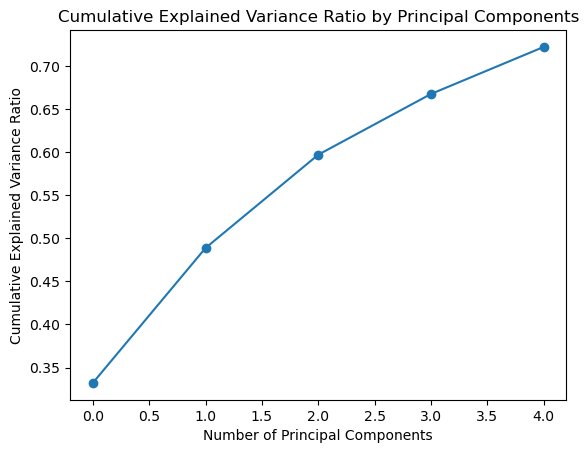

PCA Projection Loss 6.390514754990818


In [2]:

df1 , df_hist_ret, df_vol =app.preprocess_data()
s_crypto_market, s_big_market = app.construct_market_factors(df1)
df_rets, pc_df, df_factor_loadings = app.construct_pca_factors(df1, s_big_market, s_crypto_market)


In [3]:
df_rets.columns

Index(['bitcoin_prices', 'usd-coin_prices', 'tether_prices', 'solana_prices',
       'chainlink_prices', 'ripple_prices', 'ethereum_prices',
       'binancecoin_prices', 'dogecoin_prices', 'SQ_Close', '^XAU_Close',
       'RIOT_Close', 'NVDA_Close', 'SPY_Close', 'spy', 'big_market',
       'crypto_market', '^TNX_Close', '^VIX_Close', '^IRX_Close', '^TYX_Close',
       '^FVX_Close', 'median_spread'],
      dtype='object')

# Bitcoin sensitivity to RIOT

                            OLS Regression Results                            
Dep. Variable:         bitcoin_prices   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     130.8
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.39e-24
Time:                        23:02:15   Log-Likelihood:                 541.10
No. Observations:                 249   AIC:                            -1078.
Df Residuals:                     247   BIC:                            -1071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0030      0.002      1.714      0.0

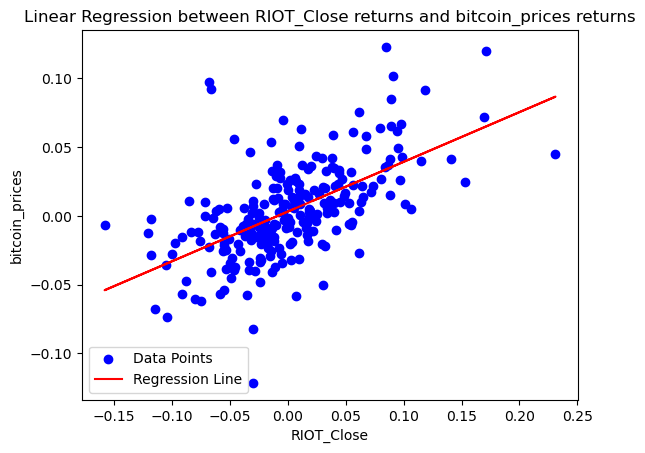

In [4]:

run_regression(df_rets, x_column="RIOT_Close", y_column="bitcoin_prices",)

# Bitcoin sensitivity to T-Bill interest rate

                            OLS Regression Results                            
Dep. Variable:         bitcoin_prices   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.001274
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.972
Time:                        23:02:15   Log-Likelihood:                 488.20
No. Observations:                 249   AIC:                            -972.4
Df Residuals:                     247   BIC:                            -965.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.044      0.040      0.9

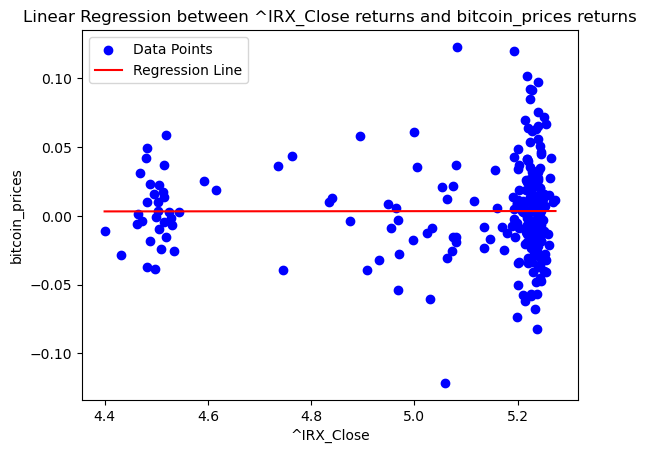

In [5]:

run_regression(df_rets, x_column="^IRX_Close", y_column="bitcoin_prices",)

# Bitcoin sensitivity to 10-year interest rate

                            OLS Regression Results                            
Dep. Variable:         bitcoin_prices   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01808
Date:                Wed, 06 Nov 2024   Prob (F-statistic):              0.893
Time:                        23:02:15   Log-Likelihood:                 488.20
No. Observations:                 249   AIC:                            -972.4
Df Residuals:                     247   BIC:                            -965.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.035     -0.040      0.9

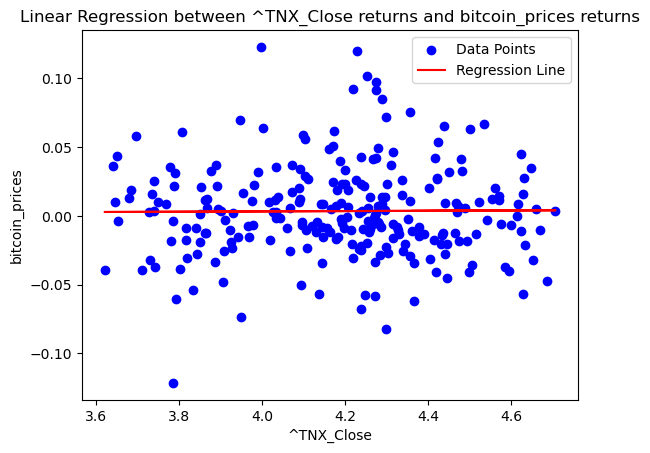

In [6]:

m2=run_regression(df_rets, x_column="^TNX_Close", y_column="bitcoin_prices",)

In [7]:
m2.params
#m2.pvalues

const        -0.001389
^TNX_Close    0.001128
dtype: float64



# For all crypto assets, get sensitivity to SPY, RIOT, NVDA, T-Bill Interest Rate, 10-Year Interest Rate, and Gold Price

                            OLS Regression Results                            
Dep. Variable:         bitcoin_prices   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     24.28
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           1.53e-06
Time:                        23:02:15   Log-Likelihood:                 499.87
No. Observations:                 249   AIC:                            -995.7
Df Residuals:                     247   BIC:                            -988.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0018      0.002      0.840      0.4

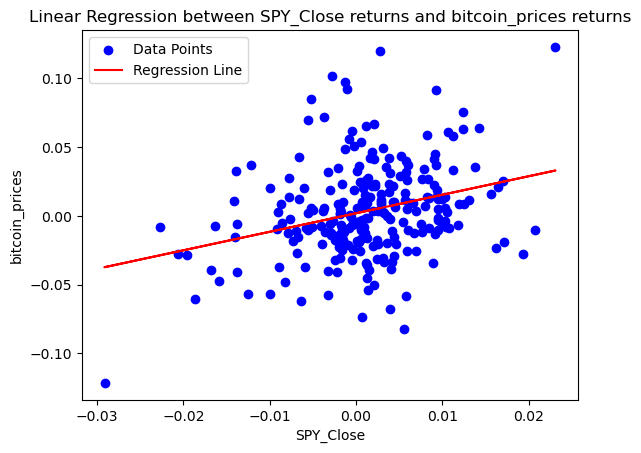

In [8]:
m3=run_regression(df_rets, x_column= "SPY_Close", y_column="bitcoin_prices", plot_chart=True)

m3

In [9]:

result, result_sigificant = regress_all_macro_factors(df_rets)

In [10]:
result

,SPY_Close,RIOT_Close,NVDA_Close,^IRX_Close,^TNX_Close,^XAU_Close
sensitivity_bitcoin_prices,1.344206e+00,3.610920e-01,0.180977,0.000308,0.001128,0.252836
p_value_bitcoin_prices,1.528409e-06,1.386980e-24,0.006175,0.971556,0.893156,0.020441
sensitivity_usd-coin_prices,5.958398e-03,-3.232133e-04,-0.001464,-0.000023,0.000048,0.004603
p_value_usd-coin_prices,4.507713e-01,7.646710e-01,0.425788,0.924907,0.834978,0.127737
sensitivity_tether_prices,1.817581e-02,2.997651e-03,0.000724,-0.000010,-0.000020,0.007311
p_value_tether_prices,8.472384e-03,1.426492e-03,0.654452,0.960228,0.921531,0.005681
sensitivity_solana_prices,2.377643e+00,4.469014e-01,0.251025,0.006926,0.004204,0.390236
p_value_solana_prices,1.434401e-07,1.009284e-13,0.019580,0.621898,0.757838,0.027645
sensitivity_chainlink_prices,2.393430e+00,4.107736e-01,0.406590,-0.000089,-0.003765,0.460755
p_value_chainlink_prices,1.716362e-09,9.496691e-15,0.000016,0.994301,0.755521,0.003247


# Filter out significant sensitivity with p-value threshold 0.01

In [11]:
result_sigificant

,SPY_Close,RIOT_Close,NVDA_Close,^IRX_Close,^TNX_Close,^XAU_Close
sensitivity_bitcoin_prices,1.344206e+00,3.610920e-01,0.180977,NaN,NaN,NaN
p_value_bitcoin_prices,1.528409e-06,1.386980e-24,0.006175,NaN,NaN,NaN
sensitivity_tether_prices,1.817581e-02,2.997651e-03,NaN,NaN,NaN,0.007311
p_value_tether_prices,8.472384e-03,1.426492e-03,NaN,NaN,NaN,0.005681
sensitivity_solana_prices,2.377643e+00,4.469014e-01,NaN,NaN,NaN,NaN
p_value_solana_prices,1.434401e-07,1.009284e-13,NaN,NaN,NaN,NaN
sensitivity_chainlink_prices,2.393430e+00,4.107736e-01,0.406590,NaN,NaN,0.460755
p_value_chainlink_prices,1.716362e-09,9.496691e-15,0.000016,NaN,NaN,0.003247
sensitivity_ripple_prices,1.141733e+00,2.466118e-01,NaN,NaN,NaN,NaN
p_value_ripple_prices,2.300709e-04,2.624128e-09,NaN,NaN,NaN,NaN
